In [1]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import mglearn

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import make_moons

In [2]:
X, y =make_moons(n_samples=100,noise=0.25,random_state=3)
print(X.shape,y.shape)

(100, 2) (100,)


In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(75, 2) (75,)
(25, 2) (25,)


`n_estimators` The number of trees in the forest  
`max_features` The number of features to consider when looking for the best split

In [4]:
forest = RandomForestClassifier(n_estimators=5,random_state=2)
forest.fit(X_train, y_train)
# this forest has 5 trees

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

In [5]:
print('training score: {}'.format(forest.score(X_train,y_train)))
print('testing score: {}'.format(forest.score(X_test,y_test)))

training score: 0.9866666666666667
testing score: 0.88


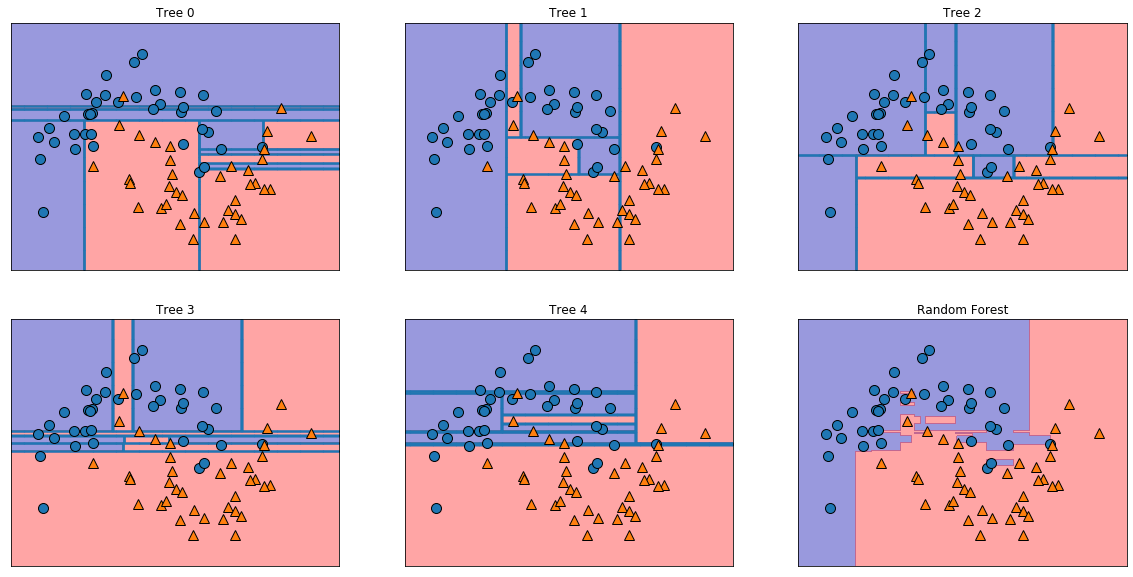

In [6]:
fig, axes = plt.subplots(2, 3, figsize = (20,10))
for i, (ax, tree) in enumerate(zip(axes.ravel(),forest.estimators_)):
    ax.set_title('Tree {}'.format(i))
    mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1,-1],alpha=0.4)
axes[-1,-1].set_title('Random Forest')
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)

In [7]:
# for breast cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer['data'],cancer['target'],stratify=cancer.target,random_state = 42)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)
forest=RandomForestClassifier(n_estimators=100,random_state=0)
forest.fit(X_train,y_train)

(426, 30) (426,)
(143, 30) (143,)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [8]:
print('training score: {}'.format(forest.score(X_train,y_train)))
print('testing score: {}'.format(forest.score(X_test,y_test)))

training score: 1.0
testing score: 0.958041958041958


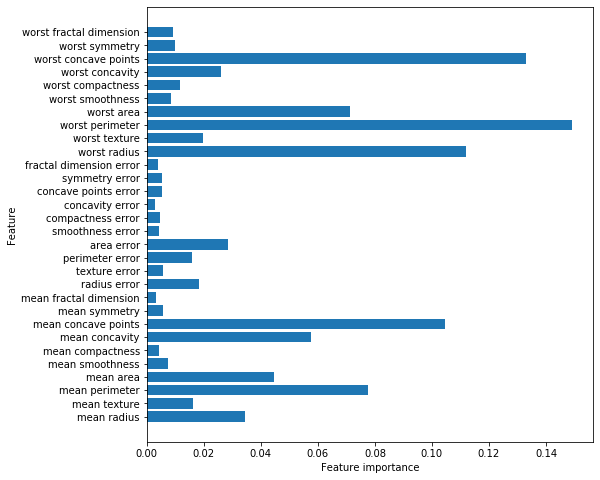

In [9]:
def plot_feature_importance_cancer(model):
    n_feat = cancer.data.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_feat),model.feature_importances_,align = 'center')
    plt.yticks(np.arange(n_feat),cancer.feature_names)
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')
    
plot_feature_importance_cancer(forest)